In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pvlib

In [3]:
weather = pd.read_csv("weather_test.csv")
temp_data = pd.DataFrame(weather.tavg)
weather.index = pd.date_range(start='2017-01-01', end='2019-12-31', freq='D')
temp_data.index = weather.index

In [6]:
import pandas as pd
import pvlib

# Set location information (latitude, longitude, and elevation)
latitude = 12.971598
longitude = 77.594562
altitude = 920
tz = 'Asia/Kolkata'

weather_data = temp_data.tavg
times = weather_data.index
location = pvlib.location.Location(latitude, longitude, tz=tz)

# Calculate solar position
solar_position = pvlib.solarposition.get_solarposition(times, latitude, longitude)

# Calculate extraterrestrial radiation
dni_extra = pvlib.irradiance.get_extra_radiation(times)

# Calculate air mass, replacing NaN values with a default value (e.g., 10)
airmass = pvlib.atmosphere.get_relative_airmass(solar_position['apparent_zenith']).fillna(10)

# Assuming no direct horizontal irradiance (dhi) available, set it to zero
dhi = pd.Series(0, index=times)

# Calculate the solar panel tilt and azimuth dynamically based on solar position
solar_panel_tilt = 90 - solar_position['apparent_elevation']
solar_panel_azimuth = solar_position['azimuth']

# Ensure tilt values are within a reasonable range (0 to 90 degrees)
solar_panel_tilt = solar_panel_tilt.clip(0, 90)

# Use temperature data from your CSV file
temp_air = temp_data['tavg']

# Calculate total radiation on a tilted surface with dynamic tilt and azimuth
total_irradiance_dynamic = pvlib.irradiance.get_total_irradiance(
    solar_panel_tilt, solar_panel_azimuth, solar_position['apparent_zenith'],
    solar_position['azimuth'], dni_extra, dhi, airmass)

# Convert irradiance to energy (assuming a 1 kW system)
system_size_kw = 3
energy_dynamic = total_irradiance_dynamic * system_size_kw/1000

# Create a pandas DataFrame to store the results
result_df_dynamic = pd.DataFrame(index=times)
result_df_dynamic['Energy_Generated_KWh'] = energy_dynamic['poa_global']
result_df_dynamic['Temperature_C'] = temp_air  # Use the existing temperature data

# Print the resulting DataFrame with dynamic tilt and azimuth
print(result_df_dynamic)

            Energy_Generated_KWh  Temperature_C
2017-01-01              4.070021           21.0
2017-01-02              4.067987           21.6
2017-01-03              4.065947           22.3
2017-01-04              4.063905           21.8
2017-01-05              4.061864           21.9
...                          ...            ...
2019-12-27              4.081675           23.4
2019-12-28              4.079706           21.9
2019-12-29              4.077713           21.8
2019-12-30              4.075700           21.7
2019-12-31              4.073668           21.9

[1095 rows x 2 columns]


<Axes: >

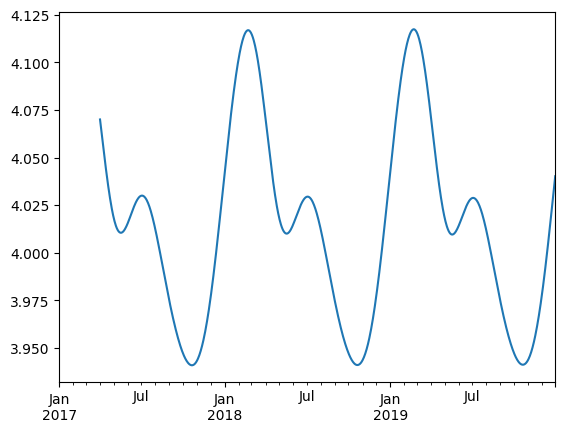

In [8]:
result_df_dynamic["Energy_Generated_KWh"] = result_df_dynamic["Energy_Generated_KWh"].shift(90).dropna()
result_df_dynamic["Energy_Generated_KWh"].plot()

In [9]:
result_df_dynamic.dropna(inplace=True)

noise

In [10]:
import pandas as pd
import pvlib

# Set location information (latitude, longitude, and elevation)
latitude = 12.971598
longitude = 77.594562
altitude = 920
tz = 'Asia/Kolkata'

weather_data = temp_data.tavg
times = weather_data.index
location = pvlib.location.Location(latitude, longitude, tz=tz)

# Calculate solar position
solar_position = pvlib.solarposition.get_solarposition(times, latitude, longitude)

# Calculate extraterrestrial radiation
dni_extra = pvlib.irradiance.get_extra_radiation(times)

# Calculate air mass, replacing NaN values with a default value (e.g., 10)
airmass = pvlib.atmosphere.get_relative_airmass(solar_position['apparent_zenith']).fillna(10)

# Assuming no direct horizontal irradiance (dhi) available, set it to zero
dhi = pd.Series(0, index=times)

# Calculate the solar panel tilt and azimuth dynamically based on solar position
solar_panel_tilt = 90 - solar_position['apparent_elevation']
solar_panel_azimuth = solar_position['azimuth']

# Ensure tilt values are within a reasonable range (0 to 90 degrees)
solar_panel_tilt = solar_panel_tilt.clip(0, 90)

# Use temperature data from your CSV file
temp_air = temp_data['tavg']


# Generate random noise for temperature and irradiance
noise_temp = np.random.normal(0, 2, len(times))  # Adjust the parameters based on your preference
noise_irradiance = np.random.normal(0, 50, len(times))  # Adjust the parameters based on your preference

# Add noise to the temperature and irradiance variables
temp_air_with_noise = temp_air + noise_temp
total_irradiance_dynamic_with_noise = pvlib.irradiance.get_total_irradiance(
    solar_panel_tilt, solar_panel_azimuth, solar_position['apparent_zenith'],
    solar_position['azimuth'], dni_extra, dhi, airmass)['poa_global'] + noise_irradiance

# Convert irradiance to energy (assuming a 1 kW system)
system_size_kw = 3
energy_dynamic_with_noise = total_irradiance_dynamic_with_noise * system_size_kw / 1000

# Create a pandas DataFrame to store the results with noise
result_df_dynamic_with_noise = pd.DataFrame(index=times)
result_df_dynamic_with_noise['Energy_Generated_KWh'] = energy_dynamic_with_noise
result_df_dynamic_with_noise['Temperature_C'] = temp_air_with_noise

# Print the resulting DataFrame with noise
print(result_df_dynamic_with_noise)

            Energy_Generated_KWh  Temperature_C
2017-01-01              4.007282      21.249524
2017-01-02              4.203925      21.712081
2017-01-03              3.990615      22.009777
2017-01-04              3.881347      19.706018
2017-01-05              3.899089      22.586323
...                          ...            ...
2019-12-27              3.908926      22.439689
2019-12-28              3.900219      26.837200
2019-12-29              4.270040      21.579329
2019-12-30              4.064921      22.630063
2019-12-31              3.908209      23.089689

[1095 rows x 2 columns]


<Axes: >

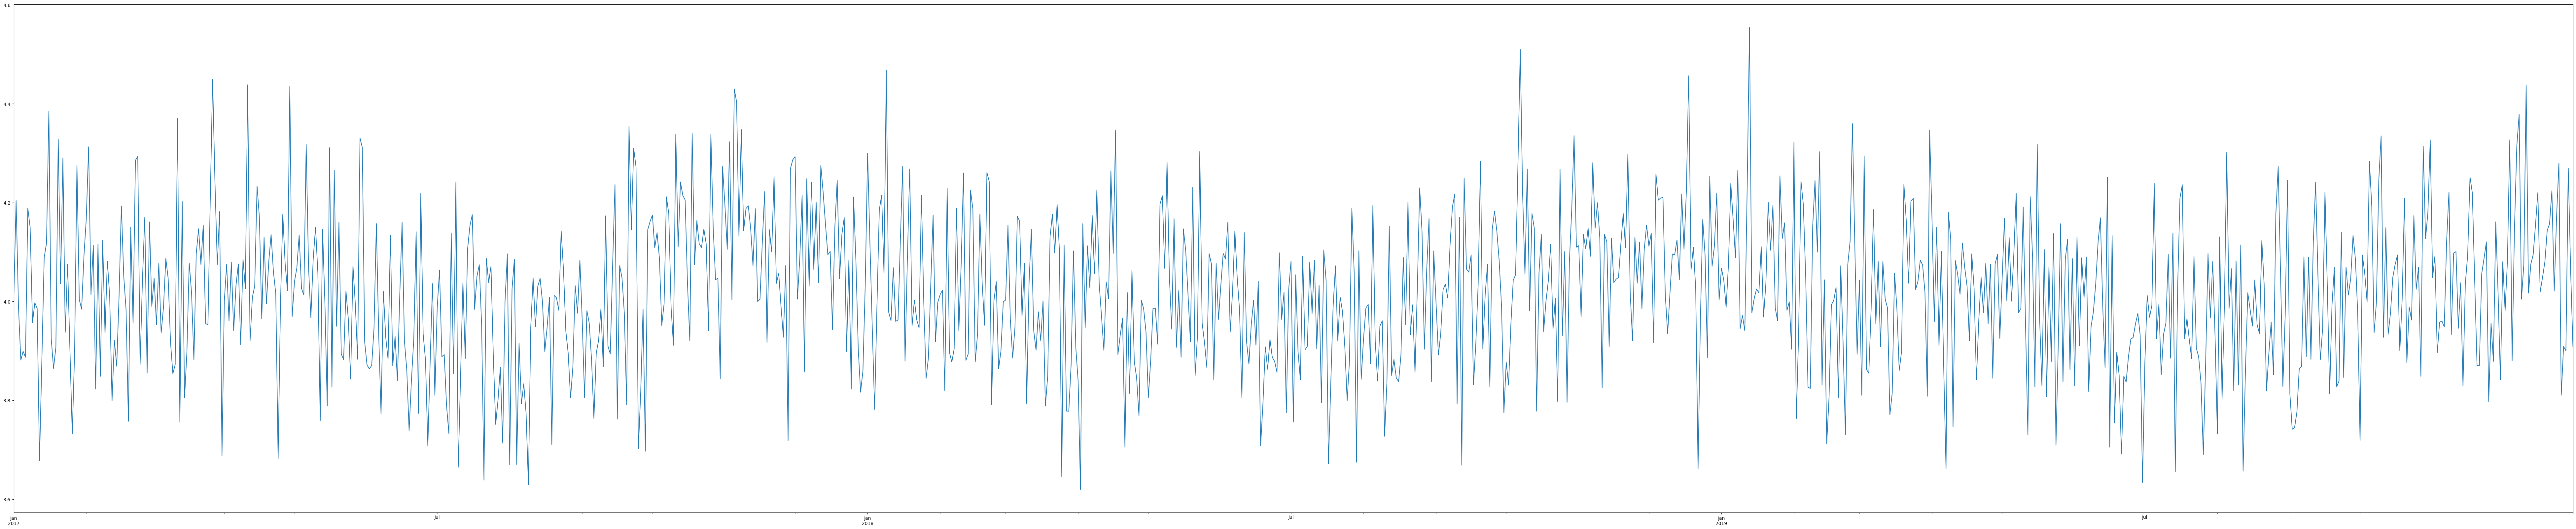

In [11]:
result_df_dynamic_with_noise['Energy_Generated_KWh'].plot(figsize=(100,20))

In [12]:
final_test = pd.concat([result_df_dynamic_with_noise, solar_position["apparent_zenith"], solar_position["azimuth"], total_irradiance_dynamic_with_noise], axis=1)
final_test.head()

,Energy_Generated_KWh,Temperature_C,apparent_zenith,azimuth,poa_global
2017-01-01,4.007282,21.249524,107.072437,110.407309,1335.760566
2017-01-02,4.203925,21.712081,107.169217,110.303927,1401.308206
2017-01-03,3.990615,22.009777,107.263767,110.192788,1330.205102
2017-01-04,3.881347,19.706018,107.355967,110.073943,1293.782200
2017-01-05,3.899089,22.586323,107.445699,109.947445,1299.696243


In [ ]:
final_test.to_csv("gen_test.csv")